<style>
    h1 {
        color: #1f488e;
        font-size: 24px;
        font-weight: bold;
        margin-bottom: 16px;
    }
    
    p {
        color: #333;
        font-size: 16px;
        line-height: 1.5;
        margin-bottom: 12px;
    }
    
    ol {
        margin-left: 20px;
        margin-bottom: 12px;
    }
    
    li {
        color: #666;
        font-size: 14px;
        line-height: 1.4;
        margin-bottom: 6px;
    }
</style>

<h1>PROJECT OVERVIEW</h1>

<p>This project focuses on web scraping, specifically extracting data from the Setopati news website. The objective is to scrape news data from multiple web pages, with the number of pages determined by the user. The data will then be processed and organized into a final DataFrame for further analysis.</p>

<p>To accomplish this task, the project utilizes several important Python libraries, including Beautiful Soup, Pandas, NumPy, and Matplotlib. Beautiful Soup is employed for web scraping, allowing the program to extract relevant information from the Setopati web pages. Pandas and NumPy are used for data manipulation and organization, enabling the creation of a structured DataFrame from the raw news data. Matplotlib is utilized for data visualization, enabling the creation of plots and charts to analyze and present the news data.</p>

<p>In addition to these libraries, the project also utilizes NLTK (Natural Language Toolkit) for news data cleaning. NLTK provides useful functions such as stopwords removal and the PorterStemmer algorithm for stemming words in the news data. Regular expressions are employed to enhance the cleaning process and ensure the data is appropriately formatted.</p>

<p>To further enhance the project's functionality, the final DataFrame can be exported into various formats, such as CSV or Excel, for easier sharing and analysis. This allows users to leverage the extracted news data in other tools and applications.</p>

<p><b>Overall, the project encompasses the following steps:</b></p>
<ol>
  <li>Web scraping using Beautiful Soup to extract news data from Setopati web pages.</li>
  <li>Data cleaning and preprocessing using NLTK, including stopwords removal and word stemming.</li>
  <li>Utilizing regular expressions to enhance the cleaning process and ensure data formatting.</li>
  <li>Creating a structured DataFrame from the cleaned news data using Pandas and NumPy.</li>
  <li>Applying data visualization techniques with Matplotlib to analyze and present the news data.</li>
  <li>Optional: Exporting the final DataFrame into CSV or Excel formats for further analysis or sharing.</li>
</ol>


# CODING PART :-

<pre style="font-family: 'Arial', sans-serif; font-size: 16px; font-style: italic; background-color: #f8f8f8; padding: 10px;">
The code prompts the user to enter the number of pages they want to scrape for each category. It then iterates over the specified number of pages for each category and uses BeautifulSoup to parse the HTML content of each page. It finds the section containing the links and checks if each link meets certain criteria (e.g., having a 6-digit number in the URL). If a link satisfies the criteria, it adds the category and the link to the dataset dictionary. Finally, it prints the dataset containing the scraped data.
</pre>


In [1]:
from bs4 import BeautifulSoup  # Importing the BeautifulSoup library for HTML parsing
import requests  # Importing the requests library for making HTTP requests

dataset = {'category': [], 'links': []}  # Creating an empty dictionary to store scraped data
categories = ['political', 'social', 'market', 'entertainment', 'sports', 'view', 'blog', 'International']  # List of categories to scrape

while True:
    try:
        n = int(input('Enter the number of pages you want to scrap: '))  # Prompting the user to enter the number of pages to scrape
        if n <= 0:
            print("Please enter a positive integer value.")  # Checking if the input is a positive integer
            continue
        break
    except ValueError:
        print("Invalid input. Please enter a valid integer.")  # Handling invalid input

for cat in categories:  # Iterating over each category
    for i in range(1, n + 1):  # Iterating over the specified number of pages
        url = f"https://en.setopati.com/{cat}?page={i}"  # Generating the URL for each page of the category
        try:
            response = requests.get(url)  # Sending an HTTP GET request to the URL
            soup_ = BeautifulSoup(response.text, 'html.parser')  # Parsing the HTML content of the response
            links = soup_.find("section", class_="section special-news cat-list")  # Finding the section containing the links
            if links is None:
                print(f"No pages available for category '{cat}'. Skipping...")  # If no links are found, skip to the next category
                break
            for link in links.find_all('a'):  # Iterating over each link found in the section
                x = link.get('href').split('/')  # Splitting the link URL by "/"
                if len(x[-1]) == 6 and x[-1].isdigit():  # Checking if the last part of the URL is a 6-digit number
                    l = '/'.join(x)  # Rejoining the split URL parts
                    dataset['category'].append(cat)  # Adding the category to the dataset
                    dataset['links'].append(l)  # Adding the link to the dataset
        except Exception as e:
            print(f"An error occurred while processing {url}: {e}")  # Handling any exceptions that occur during processing

print(dataset)  # Printing the final dataset containing the scraped data


Enter the number of pages you want to scrap: 2
{'category': ['political', 'political', 'political', 'political', 'political', 'political', 'political', 'political', 'political', 'political', 'political', 'political', 'political', 'political', 'political', 'political', 'political', 'political', 'political', 'political', 'political', 'political', 'political', 'political', 'political', 'political', 'political', 'political', 'political', 'political', 'political', 'political', 'political', 'political', 'political', 'political', 'political', 'political', 'political', 'political', 'political', 'political', 'social', 'social', 'social', 'social', 'social', 'social', 'social', 'social', 'social', 'social', 'social', 'social', 'social', 'social', 'social', 'social', 'social', 'social', 'social', 'social', 'social', 'social', 'social', 'social', 'social', 'social', 'social', 'social', 'social', 'social', 'social', 'social', 'social', 'social', 'social', 'social', 'social', 'social', 'social', 'so

<pre style="font-family: 'Arial', sans-serif; font-size: 16px; font-style: italic; background-color: #f8f8f8; padding: 10px;">
The code provided below is using the <span style="font-weight: bold;">pandas</span> library to create a DataFrame from the dataset dictionary and assigning it to the variable <span style="font-weight: bold;">df</span>.

</pre>


In [2]:
import pandas as pd  # Importing the pandas library

df = pd.DataFrame(dataset)  # Creating a DataFrame from the dataset dictionary and assigning it to the variable df

df

,category,links
0,political,https://en.setopati.com/political/161336
1,political,https://en.setopati.com/political/161336
2,political,https://en.setopati.com/political/161368
3,political,https://en.setopati.com/political/161365
4,political,https://en.setopati.com/political/161364
...,...,...
286,International,https://en.setopati.com/International/161269
287,International,https://en.setopati.com/International/161262
288,International,https://en.setopati.com/International/161261
289,International,https://en.setopati.com/International/161259


In [3]:
df.to_csv('news_links.csv')

<pre style="font-family: 'Arial', sans-serif; font-size: 16px; font-style: italic; background-color: #f8f8f8; padding: 10px;">
In the below code, the loop iterates over each link in the 'links' column of the DataFrame (<span style="font-weight: bold;">df</span>). For each link, it sends an HTTP GET request to the URL and parses the XML content of the response using BeautifulSoup. It then searches for a &lt;div&gt; element with the class "editor-box" that contains the news content. The news content is extracted using the <span style="font-weight: bold;">.text</span> attribute and appended to the <span style="font-weight: bold;">news_list</span>.

Finally, the code adds a new column 'news' to the DataFrame (<span style="font-weight: bold;">df</span>) and assigns it the values from the <span style="font-weight: bold;">news_list</span>. This column will contain the extracted news content for each link. The <span style="font-weight: bold;">news_list</span> is printed at the end, although it is not necessary for the code's functionality.
</pre>


In [4]:
news_list = []  # Creating an empty list to store the news content

for link in df['links']:  # Iterating over each link in the 'links' column of the DataFrame
    url = link  # Assigning the link URL to the variable 'url'
    response = requests.get(url)  # Sending an HTTP GET request to the URL
    soup_ = BeautifulSoup(response.text, 'xml')  # Parsing the XML content of the response using BeautifulSoup
    news = soup_.find("div", class_="editor-box")  # Finding the <div> element with the class "editor-box" containing the news content
    news_list.append(news.text)  # Appending the news content to the 'news_list'

df['news'] = news_list  # Adding a new column 'news' to the DataFrame and assigning it the values from 'news_list'

news_list  # Printing the 'news_list'

["\nThe proposal of Bam Dev Gautam, who has formed CPN (Unity National Campaign), to rejoin CPN-UML has got stuck.\nGautam, who seems enthusiastic after the main opposition party removed the age limit of 70 years for executive committees, had reached UML office Chyasal and met Chairman KP Sharma Oli on June 18 and expressed his wish to rejoin the party.\nGautam, who has claimed that he can help UML expand its party membership to six million, had also briefed Oli about his preliminary concept of achieving socialism with Nepali characteristics during the meeting.\nBut UML seems lukewarm to his proposal. I had gone with the proposal of unification. I had cordial and open talks with Oli. He had said that we should unite, and invited me, Gautam told Setopati. But they have not got back to me now. They have not even called me.\nHe stated that he had told Oli that he would return with party cadres and asked what role he would be given. But he did not give solid answers. He only said I should 

In [5]:
df

,category,links,news
0,political,https://en.setopati.com/political/161336,"\nThe proposal of Bam Dev Gautam, who has form..."
1,political,https://en.setopati.com/political/161336,"\nThe proposal of Bam Dev Gautam, who has form..."
2,political,https://en.setopati.com/political/161368,\nThe Supreme Court did not hear the petition ...
3,political,https://en.setopati.com/political/161365,\nThe voice in an audio recording linking Nepa...
4,political,https://en.setopati.com/political/161364,\nThe three major parties have agreed to end t...
...,...,...,...
286,International,https://en.setopati.com/International/161269,\nGlaciers are melting at unprecedented rates ...
287,International,https://en.setopati.com/International/161262,\nU.S. Secretary of State Antony Blinken met o...
288,International,https://en.setopati.com/International/161261,\nA rescue operation was underway deep in the ...
289,International,https://en.setopati.com/International/161259,\nUSSecretary of State Antony Blinken met with...


In [6]:
df.to_csv('news_data.csv')

In [7]:
import numpy as np
import re,string
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords 
from nltk.stem import PorterStemmer #to find the root words 
nltk.download('stopwords')
%matplotlib inline

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\miraj\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [8]:

# Read the dataset into a pandas DataFrame
df = pd.read_csv('news_data.csv')

# Remove the "Unnamed: 0" column
df.drop(columns='Unnamed: 0', inplace=True)

# Print the updated DataFrame
df


,category,links,news
0,political,https://en.setopati.com/political/161336,"\nThe proposal of Bam Dev Gautam, who has form..."
1,political,https://en.setopati.com/political/161336,"\nThe proposal of Bam Dev Gautam, who has form..."
2,political,https://en.setopati.com/political/161368,\nThe Supreme Court did not hear the petition ...
3,political,https://en.setopati.com/political/161365,\nThe voice in an audio recording linking Nepa...
4,political,https://en.setopati.com/political/161364,\nThe three major parties have agreed to end t...
...,...,...,...
286,International,https://en.setopati.com/International/161269,\nGlaciers are melting at unprecedented rates ...
287,International,https://en.setopati.com/International/161262,\nU.S. Secretary of State Antony Blinken met o...
288,International,https://en.setopati.com/International/161261,\nA rescue operation was underway deep in the ...
289,International,https://en.setopati.com/International/161259,\nUSSecretary of State Antony Blinken met with...


In [9]:
#No of a categories
len((set(df['category']))) # category ma duplicated items xa set use gare paxi euta matra aauxa so 

8

In [10]:
df['category'].value_counts()

political        42
social           42
sports           42
view             42
blog             42
International    42
entertainment    38
market            1
Name: category, dtype: int64

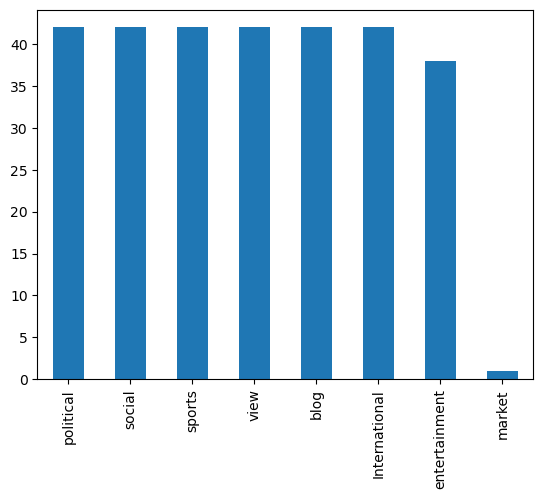

In [11]:
df['category'].value_counts().plot.bar()  # Counting the occurrences of each category in the 'category' column and creating a bar plot
plt.show()  # Displaying the plot


In [12]:
#only for understanding --------------you can ignore this and its output-----------------------------------------------

#sample cleaning for one news data for one news data

nltk.download('stopwords')  # Downloading the NLTK stopwords corpus

words = stopwords.words("english")  # Obtaining the list of stopwords for English

stemmer = PorterStemmer()  # Creating an instance of the PorterStemmer

regs = re.sub("[^a-zA-Z]", " ", df['news'][0])  # Removing non-alphabetic characters from the first news in the 'news' column
all_tokens = regs.split()  # Splitting the news into individual tokens (words)
all_tokens = " ".join([i.lower() for i in all_tokens if i.lower() not in words])  # Removing stopwords and converting tokens to lowercase
print(all_tokens)  # Printing the cleaned tokens

stem_news = "".join([stemmer.stem(i) for i in all_tokens])  # Stemming the cleaned tokens
stem_news  # Printing the stemmed news


proposal bam dev gautam formed cpn unity national campaign rejoin cpn uml got stuck gautam seems enthusiastic main opposition party removed age limit years executive committees reached uml office chyasal met chairman kp sharma oli june expressed wish rejoin party gautam claimed help uml expand party membership six million also briefed oli preliminary concept achieving socialism nepali characteristics meeting uml seems lukewarm proposal gone proposal unification cordial open talks oli said unite invited gautam told setopati got back even called stated told oli would return party cadres asked role would given give solid answers said join party said alone could give responsibilities party committees take decision additional discussion also talks joining socialist front announced cpn maoist center cpn unified socialist janata samajwadi party jsp cpn led netra bikram chand nobody come talk socialist front prime minister pm pushpa kamal dahal talking reviving cpn formed unification maoist ce

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\miraj\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


'proposal bam dev gautam formed cpn unity national campaign rejoin cpn uml got stuck gautam seems enthusiastic main opposition party removed age limit years executive committees reached uml office chyasal met chairman kp sharma oli june expressed wish rejoin party gautam claimed help uml expand party membership six million also briefed oli preliminary concept achieving socialism nepali characteristics meeting uml seems lukewarm proposal gone proposal unification cordial open talks oli said unite invited gautam told setopati got back even called stated told oli would return party cadres asked role would given give solid answers said join party said alone could give responsibilities party committees take decision additional discussion also talks joining socialist front announced cpn maoist center cpn unified socialist janata samajwadi party jsp cpn led netra bikram chand nobody come talk socialist front prime minister pm pushpa kamal dahal talking reviving cpn formed unification maoist c

In [13]:
# just for understanding ----------------this can be ignored-----------------------------------------------------------------
x= df['news'][0]
test_=re.sub("[^a-zA-Z]", " ", x).split()
test_

['The',
 'proposal',
 'of',
 'Bam',
 'Dev',
 'Gautam',
 'who',
 'has',
 'formed',
 'CPN',
 'Unity',
 'National',
 'Campaign',
 'to',
 'rejoin',
 'CPN',
 'UML',
 'has',
 'got',
 'stuck',
 'Gautam',
 'who',
 'seems',
 'enthusiastic',
 'after',
 'the',
 'main',
 'opposition',
 'party',
 'removed',
 'the',
 'age',
 'limit',
 'of',
 'years',
 'for',
 'executive',
 'committees',
 'had',
 'reached',
 'UML',
 'office',
 'Chyasal',
 'and',
 'met',
 'Chairman',
 'KP',
 'Sharma',
 'Oli',
 'on',
 'June',
 'and',
 'expressed',
 'his',
 'wish',
 'to',
 'rejoin',
 'the',
 'party',
 'Gautam',
 'who',
 'has',
 'claimed',
 'that',
 'he',
 'can',
 'help',
 'UML',
 'expand',
 'its',
 'party',
 'membership',
 'to',
 'six',
 'million',
 'had',
 'also',
 'briefed',
 'Oli',
 'about',
 'his',
 'preliminary',
 'concept',
 'of',
 'achieving',
 'socialism',
 'with',
 'Nepali',
 'characteristics',
 'during',
 'the',
 'meeting',
 'But',
 'UML',
 'seems',
 'lukewarm',
 'to',
 'his',
 'proposal',
 'I',
 'had',
 'gone

In [14]:
#cleaning dataset

nltk.download('stopwords')  # Downloading the NLTK stopwords corpus

stemmer = PorterStemmer()  # Creating an instance of the PorterStemmer

words = stopwords.words("english")  # Obtaining the list of stopwords for English

df['cleaned'] = df['news'].apply(lambda x: " ".join([stemmer.stem(i) for i in re.sub("[^a-zA-Z]", " ", x).split() if i not in words]).lower())
# Creating a new column 'cleaned' in the DataFrame and applying data cleaning and stemming operations on the 'news' column

df  # Displaying the updated DataFrame


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\miraj\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,category,links,news,cleaned
0,political,https://en.setopati.com/political/161336,"\nThe proposal of Bam Dev Gautam, who has form...",the propos bam dev gautam form cpn uniti natio...
1,political,https://en.setopati.com/political/161336,"\nThe proposal of Bam Dev Gautam, who has form...",the propos bam dev gautam form cpn uniti natio...
2,political,https://en.setopati.com/political/161368,\nThe Supreme Court did not hear the petition ...,the suprem court hear petit file format new ko...
3,political,https://en.setopati.com/political/161365,\nThe voice in an audio recording linking Nepa...,the voic audio record link nepali congress law...
4,political,https://en.setopati.com/political/161364,\nThe three major parties have agreed to end t...,the three major parti agre end hous obstruct p...
...,...,...,...,...
286,International,https://en.setopati.com/International/161269,\nGlaciers are melting at unprecedented rates ...,glacier melt unpreced rate across hindu kush h...
287,International,https://en.setopati.com/International/161262,\nU.S. Secretary of State Antony Blinken met o...,u s secretari state antoni blinken met monday ...
288,International,https://en.setopati.com/International/161261,\nA rescue operation was underway deep in the ...,a rescu oper underway deep water atlant ocean ...
289,International,https://en.setopati.com/International/161259,\nUSSecretary of State Antony Blinken met with...,ussecretari state antoni blinken met chines pr...


<pre style="font-family: 'Arial', sans-serif; font-size: 16px; font-style: italic; background-color: #f8f8f8; padding: 10px;">
In this code, the <span style="font-weight: bold;">NLTK</span> library is used to download the stopwords corpus. Stopwords are common words that are often removed from text analysis because they do not carry significant meaning.<br><br>
The code creates an instance of the <span style="font-weight: bold;">PorterStemmer</span> class, which is a widely-used stemming algorithm.<br><br>
The line <span style="font-weight: bold;">words = stopwords.words("english")</span> retrieves the list of stopwords specifically for the English language.<br><br>
The following line <span style="font-weight: bold;">df['cleaned'] = df['news'].apply(lambda x: " ".join([stemmer.stem(i) for i in re.sub("[^a-zA-Z]", " ", x).split() if i not in words]).lower())</span> performs the following operations:<br><br>
- The <span style="font-weight: bold;">.apply()</span> method is used to apply a function to each element in the 'news' column of the DataFrame.<br>
- The <span style="font-weight: bold;">lambda function</span> <span style="font-weight: bold;">lambda x: " ".join([stemmer.stem(i) for i in re.sub("[^a-zA-Z]", " ", x).split() if i not in words]).lower()</span> is defined to process each news text.<br>
- The news text is cleaned by removing non-alphabetic characters using <span style="font-weight: bold;">re.sub("[^a-zA-Z]", " ", x)</span>. It replaces any non-alphabetic character with a space.<br>
- The cleaned text is split into individual tokens using <span style="font-weight: bold;">.split()</span>.<br>
- Each token is checked against the list of stopwords (<span style="font-weight: bold;">if i not in words</span>), and only non-stopwords are considered.<br>
- Finally, the remaining tokens are stemmed using <span style="font-weight: bold;">[stemmer.stem(i) for i in ...]</span>. Each token is transformed to its base or root form using the PorterStemmer algorithm.<br>
- The stemmed tokens are joined back together with a space between them using <span style="font-weight: bold;">" ".join(...)</span>.<br>
- The resulting cleaned and stemmed text is assigned to the 'cleaned' column of the DataFrame.<br><br>
At the end, the updated DataFrame (<span style="font-weight: bold;">df</span>) is displayed. It now includes the 'cleaned' column, which contains the cleaned and stemmed version of the news text.
</pre>


In [15]:
#checking for the cleaned news data 
df['cleaned'][0]

'the propos bam dev gautam form cpn uniti nation campaign rejoin cpn uml got stuck gautam seem enthusiast main opposit parti remov age limit year execut committe reach uml offic chyasal met chairman kp sharma oli june express wish rejoin parti gautam claim help uml expand parti membership six million also brief oli preliminari concept achiev social nepali characterist meet but uml seem lukewarm propos i gone propos unif i cordial open talk oli he said unit invit gautam told setopati but got back they even call he state told oli would return parti cadr ask role would given but give solid answer he said i join parti he said alon could give respons parti committe take decis we addit discuss there also talk join socialist front announc cpn maoist center cpn unifi socialist janata samajwadi parti jsp cpn led netra bikram chand nobodi come talk socialist front prime minist pm pushpa kamal dahal talk reviv cpn form unif maoist center uml gautam also work toward i alway unif i doubt socialist 